# The Biot-Savart Law

We have examined current carrying wires in an external magnetic field.

We now examine the magnetic field **created** by current in a wire.

We begin, as with Coulomb's Law, by working with a simple source, and then sum (integrate) over a distribution of such sources.

More preceisely, we consider a small piece of wire with current $I$ and direction vector $d\vec\ell$ centered at a source location $\vec r_s$.

The **Biot-Savart** law states that the magnetic field, $d\vec B$, felt at the target location, $\vec r_t$, is

$$
  \boxed{ d\vec B = k_m\frac{Id\vec\ell\times(\vec r_t-\vec r_s)}{\|\vec r_t-\vec r_s\|^3}}
$$

where $k_m = 10^{-7}\, Tm/A$ is related to the permeability of free space.

For example, if $d\vec\ell=(1,0,0)$ is directed along the $x$-axis and centered at the origin, $\vec r_s = (0,0,0)$, while the
target is just above, at $\vec r_t=(0,0,1)$ we see that the field $d\vec B$ points in the direction 
$(1,0,0)\times(0,0,1)=(0,-1,0)$ out of the paper.

Let's visualize this in python.

<IPython.core.display.Javascript object>


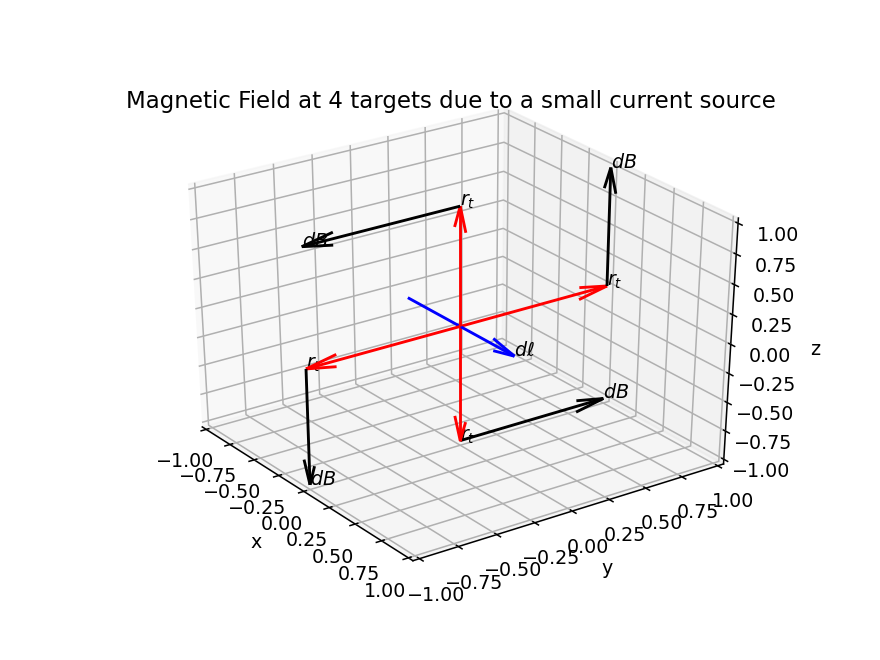

In [4]:
# examine the dB field produced by a small piece of wire at 4 targets
# this is just code for visualizing the cross product, exactly as in our previous notebook

%matplotlib notebook   
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes(projection="3d")

dell = np.array([1,0,0])   #dell is directed along x axis
ax.quiver3D(-0.5, 0, 0, dell[0], dell[1], dell[2], color = 'b', arrow_length_ratio=0.2) 
ax.text(dell[0]-0.5,dell[1],dell[2],'$d\\ell$')   # label it

rt = np.array([0,0,1])   # target is at (0,0,1) 
ax.quiver3D(0, 0, 0, rt[0], rt[1], rt[2], color = 'r', arrow_length_ratio=0.2) 
ax.text(rt[0],rt[1],rt[2],'$r_t$')

dB = np.cross(dell,rt)    # take their cross product
ax.quiver3D(rt[0], rt[1], rt[2], dB[0], dB[1], dB[2], color = 'k', arrow_length_ratio=0.2)
F = rt + dB
ax.text(F[0],F[1],F[2],'$dB$')

# now move the target and try it again

rt = np.array([0,0,-1])   # target is at (0,0,-1) 
ax.quiver3D(0, 0, 0, rt[0], rt[1], rt[2], color = 'r', arrow_length_ratio=0.2) 
ax.text(rt[0],rt[1],rt[2],'$r_t$')

dB = np.cross(dell,rt)    # take their cross product
ax.quiver3D(rt[0], rt[1], rt[2], dB[0], dB[1], dB[2], color = 'k', arrow_length_ratio=0.2)
F = rt + dB
ax.text(F[0],F[1],F[2],'$dB$')

# now move the target and try it again

rt = np.array([0,1,0])   # target is at (0,1,0) 
ax.quiver3D(0, 0, 0, rt[0], rt[1], rt[2], color = 'r', arrow_length_ratio=0.2) 
ax.text(rt[0],rt[1],rt[2],'$r_t$')

dB = np.cross(dell,rt)    # take their cross product
ax.quiver3D(rt[0], rt[1], rt[2], dB[0], dB[1], dB[2], color = 'k', arrow_length_ratio=0.2)
F = rt + dB
ax.text(F[0],F[1],F[2],'$dB$')

# now move the target and try it again

rt = np.array([0,-1,0])   # target is at (0,-1,0)
ax.quiver3D(0, 0, 0, rt[0], rt[1], rt[2], color = 'r', arrow_length_ratio=0.2) 
ax.text(rt[0],rt[1],rt[2],'$r_t$')

dB = np.cross(dell,rt)    # take their cross product
ax.quiver3D(rt[0], rt[1], rt[2], dB[0], dB[1], dB[2], color = 'k', arrow_length_ratio=0.2)
F = rt + dB
ax.text(F[0],F[1],F[2],'$dB$')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

ax.set_title('Magnetic Field at 4 targets due to a small current source');

Do you **see** the magnetic field spinning counterclockwise about the piece of wire wire? This gives us direction of the field. We are of course interested in the magnitude of the field as we approach or as we depart from the entire wire.

## Magnetic Field Generated by a Straight Wire

We consider now a full wire of sources, $\vec r_s = (x,0,0)$, along the $x$-axis,
with target at,
$\vec r_t = (0,0,R)$, a distance $R$ above the wire.  We illustrate this (with a few chunks) below

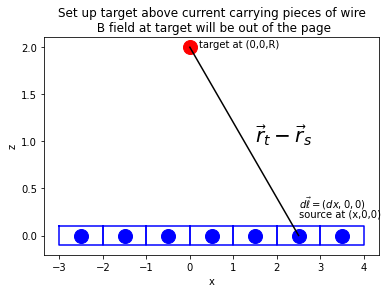

In [2]:
# draw a target above a segment of wire
%matplotlib inline

for i in range(-3,4):
    plt.plot([i,i+1,i+1,i,i],[.1, .1, -.1, -.1, .1],'b') # pieces of wire
    plt.plot(i+0.5,0,'bo',markersize=14)
    
plt.plot(0,2,'ro',markersize=14)
plt.text(0.2,2,'target at (0,0,R)')
plt.text(2.5,0.2,'source at (x,0,0)')
plt.text(2.5,0.3,'$d\\vec\ell = (dx,0,0)$')

plt.plot([0, 2.5],[2,0],'k')
plt.text(1.5,1,'$\\vec r_t-\\vec r_s$', fontsize=20)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Set up target above current carrying pieces of wire\n B field at target will be out of the page');

With regard to this figure, direct substitution brings

$$
  \vec r_t-\vec r_s = (-x,0,R) \hskip 0.25in\hbox{and}\hskip 0.25in
    \|\vec r_t-\vec r_s\|^3 = (x^2+R^2)^{3/2}
$$

In addition, $d\vec\ell = (dx,0,0)$, and so to compute $d\vec\ell \times (\vec r_t-\vec r_s)$ we turn to the general formula

$$
  \boxed{(a_x,a_y,a_z)\times (b_x,b_y,b_z) \equiv (a_yb_z-a_zb_y, a_zb_x-a_xb_z, a_xb_y-a_yb_x)}
$$

to arrive at

$$
  d\vec\ell \times (\vec r_t-\vec r_s) = (dx,0,0)\times(-x,0,R)
    = (0,-Rdx,0)
$$

and so the magnetic field at the target, $\vec B = (0,B_y,0)$, where $B_y$ is achieved by summing over every piece of the wire,

$$
  B_y = -k_mIR\int_{-\infty}^\infty \frac{dx}{(x^2+R^2)^{3/2}} = -2k_mIR\int_0^\infty \frac{dx}{(x^2+R^2)^{3/2}}
$$

where the latter is a consequence of symmetry (the sources to the left having the same contribution as sources to the right).
Next, as

$$
  \int_0^\infty \frac{1}{(x^2+R^2)^{3/2}}\,dx =
   \int_0^\infty \left(\frac{x}{R^2(x^2+R^2)^{1/2}}\right)'\,dx =
    \lim_{x\to\infty}\frac{x}{R^2(x^2+R^2)^{1/2}} = \frac{1}{R^2}
$$

it follows that

$$
  \boxed{B_y = \frac{-2k_mI}{R}}
$$

that is, the size of the magetic field is inversely proportional to the target's distance, $R$, to the wire.

## Magnetic Field Generated by a Wire Loop

We next examine the B field along the axis of a loop of current of radius $R$.

<IPython.core.display.Javascript object>


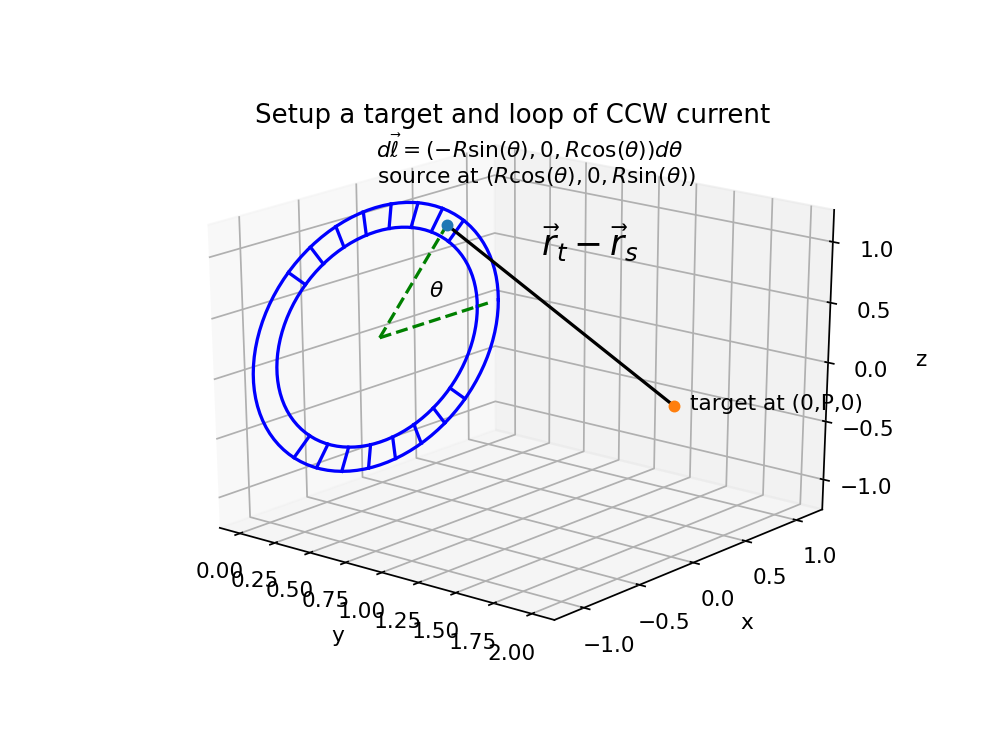

In [14]:
# setup figure 12.11 of the text

%matplotlib notebook

ax = plt.axes(projection="3d")

N = 100
t = np.linspace(0,2*np.pi,N)
x = np.zeros(N,)
y = np.cos(t)
z = np.sin(t)
ax.plot3D(x, 1.1*y, 1.1*z,'b')
ax.plot3D(x, 0.9*y, 0.9*z, 'b')
T = np.linspace(np.pi/4,3*np.pi/4,8)
rad = np.array([0.9, 1.1])
for t in T:
    ax.plot3D([0,0], np.cos(t)*rad, np.sin(t)*rad, 'b')
    ax.plot3D([0,0], np.cos(t)*rad, -np.sin(t)*rad, 'b')
    
t = (T[0] + T[1])/2
    
ax.scatter3D(0,np.cos(t),np.sin(t),'bo')
ax.plot3D([0,0],[0,1],[0,0], 'g--')
ax.plot3D([0,0],[0,np.cos(t)],[0,np.sin(t)], 'g--')
ax.text3D(0,np.cos(t/2)/2,np.sin(t/2)/2, '$\\theta$')
ax.text3D(0,0,1.3,'source at $(R\\cos(\\theta),0,R\\sin(\\theta))$')
ax.text3D(0,0,1.5,'$d\\vec\ell = (-R\\sin(\\theta),0,R\\cos(\\theta))d\\theta$')

ax.scatter3D(2,0,0,'ro')
ax.text3D(2.1,0,0, 'target at (0,P,0)')
ax.plot3D([0,2],[np.cos(t),0],[np.sin(t),0],'k')
ax.text3D(0.75,0.5,0.75,'$\\vec r_t-\\vec r_s$', fontsize=16)

ax.set_xlabel('y')   # in order to conform to figure 12.11 in our text
ax.set_ylabel('x')
ax.set_zlabel('z')
ax.set_title('Setup a target and loop of CCW current');

With this figure in mind we record the pieces required by Biot-Savart

$$
  \vec r_t - \vec r_s = (-R\cos(\theta), P, -R\sin(\theta)), \hskip 0.25in\hbox{so}\hskip 0.25in \|\vec r_t - \vec r_s\|^3 = (R^2+P^2)^{3/2}
$$

while the small current direction at $\vec r_s$ is

$$
  d\vec\ell = \frac{d}{d\theta}\vec r_s(\theta)\,d\theta = (-Rd\theta\sin(\theta),0,Rd\theta\cos(\theta))
$$

Now together we find

$$
  \eqalign{
  d\vec\ell \times (\vec r_t - \vec r_s) &= (-Rd\theta\sin(\theta),0,Rd\theta\cos(\theta))\times(-R\cos(\theta), P, -R\sin(\theta)) \cr
  &= (-PR\cos(\theta)d\theta, R^2d\theta, -PR\sin(\theta)d\theta) \cr}
$$

It remains only to sum up all the contributions as $\theta$ travels from 0 to $2\pi$. In particular

$$
  \vec B = k_mI\int_0^{2\pi} \frac{(-PR\cos(\theta)d\theta, R^2d\theta, -PR\sin(\theta)d\theta)}{(R^2+P^2)^{3/2}}
$$

As the denominator is independent of $\theta$ we break this down into three easy integrals for the components of the magnetic field at the target

$$
  B_x = k_mI\int_0^{2\pi} \frac{-PR\cos(\theta)d\theta}{(R^2+P^2)^{3/2}} = 0
$$

$$
  B_y = k_mI\int_0^{2\pi} \frac{R^2d\theta}{(R^2+P^2)^{3/2}} = \frac{2\pi k_mIR^2}{(R^2+P^2)^{3/2}}
$$

$$
  B_z = k_mI\int_0^{2\pi} \frac{-PR\sin(\theta)d\theta}{(R^2+P^2)^{3/2}} = 0
$$

That is, the magnetic field due to a current carrying loop, at a target along its axis, is directed purely along this axis and, in magnitude, behaves like $1/R$, when the target is close to the loop.

This observation marks the beginning of our derivation of the **inductor law**.

## Homework 8

1. Add 4 more targets to our first python cell above, $\vec r_t = (0, \cos((2n+1)\pi/4), \sin((2n+1)\pi/4))$, where $n=0,1,2,3$. I recommend doing this in a single for loop - starting with
<p>
<code>
for n in range(4):
        rt = np.array([0,np.cos((2*n+1)*np.pi/4),np.sin((2*n+1)*np.pi/4)])
</code>
<p>

2. Use the quotient rule to compute the derivative (with respect to x) of

$$
  \frac{x}{R^2(x^2+R^2)^{1/2}}
$$

showing all of your work. You do not need to set up or take any limits.

3. Use algebra to compute 

$$
  \lim_{x\to\infty}\frac{x}{R^2(x^2+R^2)^{1/2}}
$$

showing all of your work. Hint: $(x^2+R^2)=x^2(1+(R/x)^2)$ and $\sqrt{ab}=\sqrt{a}\sqrt{b}$. WARNING: $\sqrt{a+b}\ne \sqrt{a}+\sqrt{b}$

4. Confirm the two integrals we needed in our loop work. Show all of your work in concluding that

$$
  \int_0^{2\pi} \cos(\theta)\,d\theta = 0
$$

and

$$
  \int_0^{2\pi} \sin(\theta)\,d\theta = 0
$$

5. Find $(1,2,3)\times(1,c,1)$ and $(3,2,1)\times(1,c,1)$.
